In [30]:
# Imports & Constant Variables
import math
import matplotlib.pyplot as plt
max_iterations = 10000
tol = 1e-15

In [31]:
# Bisection Method
def bisection(f, p0, p1, tolerance, max_iter):
    start = time()
    progress = []
    p = p0
    fa = f(p)
    for i in range(1, max_iter):
        p = p0 + (p1-p0)/2
        progress.append(p)
        fp = f(p)
        if (fp == 0) | ((p1-p0)/2 < tolerance):
            end =  time()
            return "Success", p, i, progress, end-start
        if fa * fp > 0:
            p0 = p
            fa = fp
        else:
            p1 = p
    end =  time()
    return "Failure", p, max_iter, progress, end-start

In [ ]:
# Fixed Point Iteration Method
def fixed_point_iteration(g, p0, tolerance, max_iter):
    start = time()
    progress = []
    for i in range(1, max_iter):
        p = g(p0)
        progress.append(p)
        if abs(p-p0) < tolerance:
            end = time()
            return "Success", p, i, path, end-start
        p0 = p
    end = time()
    return "Failure", p, max_iter, path, end-start

In [ ]:
# Secant Method
def secant(f, p0, p1, tolerance, max_iter):
    start = time()
    progress = []
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - (q1*(p1-p0))/(q1-q0)
        progress.append(p)
        if abs(p - p1) < tolerance:
            end = time()
            return "Success", p, i, progress, end-start
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    end = time()
    return "Failure", p, max_iter, progress, end-start

In [34]:
# Inverse Quadratic - Similar to the Secant Method / A derivation from the Secant Method
def inverse_quadratic(f, x0, x1, x2, tolerance, max_iter):
    start = time()
    progress = []
    for i in range(max_iter):
        if abs(x1-x0) > tolerance: # last guess and new guess are v close
            l0 = (x0 * f(x1) * f(x2)) / ((f(x0) - f(x1)) * (f(x0) - f(x2)))
            l1 = (x1 * f(x0) * f(x2)) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
            l2 = (x2 * f(x1) * f(x0)) / ((f(x2) - f(x0)) * (f(x2) - f(x1)))
            new = l0 + l1 + l2
            x0, x1, x2 = new, x0, x1
            progress.append(x0)
        else:
            end = time()
            return "Success", x0, i, progress, end-start
    end = time()
    return "Failure", x0, max_iter, progress, end-start

In [35]:
# Brent's Method - Combines Bisection & Inverse Quadratic
def brent(f, p0, p1, tolerance, max_iter):
    start = time()
    assert (f(p0) * f(p1)) <= 0, "Root not bracketed"
    progress = []
    if abs(f(p0)) < abs(f(p1)):
        p0, p1 = p1, p0
    p2, fp2 = p0, f(p0)
    flag = True
    for i in range(max_iter):
        progress.append(p1)
        if abs(p1-p0) > tolerance:
            if (f(p0)) != fp2 and f(p1) != fp2:
                l0 = (p0 * f(p1) * fp2) / (((f(p0)) - f(p1)) * ((f(p0)) - fp2))
                l1 = (p1 * (f(p0)) * fp2) / ((f(p1) - (f(p0))) * (f(p1) - fp2))
                l2 = (p2 * f(p1) * (f(p0))) / ((fp2 - (f(p0))) * (fp2 - f(p1)))
                new = l0 + l1 + l2
            else:
                new = p1 - ( (f(p1) * (p1 - p0)) / (f(p1) - (f(p0))) )
            if ((new < ((3 * p0 + p1) / 4) or new > p1) or
                    (flag == True and (abs(new - p1)) >= (abs(p1 - p2) / 2)) or
                    (flag == False and (abs(new - p1)) >= (abs(p2 - d) / 2)) or
                    (flag == True and (abs(p1 - p2)) < tolerance) or
                    (flag == False and (abs(p2 - d)) < tolerance)):
                new = (p0 + p1) / 2
                flag = True
            else:
                flag = False
            d, p2 = p2, p1
            if ((f(p0)) * f(new)) < 0:
                p1 = new
            else:
                p0 = new
            if abs((f(p0))) < abs(f(p1)):
                p0, p1 = p1, p0
        else:
            end = time()
            return "Success", p1, i, progress, end-start
    end = time()
    return "Failure", p1, max_iter, progress, end-start

In [36]:
from time import time
# Newton's Method - NEED TO CHECK
def newton(f, df, p0, tolerance, max_iter):
    start = time()
    progress = []
    for i in range(max_iter):
        p = (p0 - f(p0))/(df(p0))
        progress.append(p)
        if abs(p-p0) < tolerance:
            end = time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time()
    return "Failure", p, max_iter, progress, end-start

In [37]:
# False Position Method
def false_position(f, p0, p1, tolerance, max_iter):
    start = time()
    progress = []
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - q1*((p1 - p0)/(q1 - q0))
        progress.append(p)
        if abs(p - p1) < tolerance:
            end = time()
            return "Success", p, i, progress, end-start
        q = f(p)
        if q * q1 < 0:
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
    end = time()
    return "Failure", p, i, progress, end-start

In [38]:
# Steffensen's Method
def steffensen(f, p0, tolerance, max_iter):
    start = time()
    progress = []
    for i in range(1, max_iter):
        p1 = p0 + f(p0)
        p2 = p1 + f(p1)
        p = p2 - (p2 - p1)**2/(p2 - (2*p1) + p0)
        progress.append(p)
        if abs(p - p0) < tolerance:
            end = time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time()
    return "Failure", p, max_iter, progress, end-start

In [39]:
# Muller's Method
def muller(f, p0, p1, p2, tolerance, max_iter):
    start = time()
    progress = []
    h1 = p1 - p0
    h2 = p2-p1
    g1 = (f(p1) - f(p0))/h1
    g2 = (f(p2) - f(p1))/h2
    d = (g1 - g2)/(h2+h1)
    for i in range(3, max_iter):
        b = g2 + h2*d
        D = (b**2 - 4*f(p2)*d)**1/2
        if abs(b-D) < abs(b+D):
            E = b + D
        else:
            E = b - D
        h = -2*f(p2)/E
        p = p2+h
        progress.append(p)
        if abs(h) < tolerance:
            end = time()
            return "Success", p, i, progress, end-start
        p0 = p1
        p1 = p2
        p2 = p
        h1 = p1 - p0
        h2 = p2 - p1
        g1 = (f(p1)-f(p0))/h1
        g2 = (f(p2)-f(p1))/h2
        d = (g2 - g1)/(h2+h1)
    end = time()
    return "Failure", p, max_iter, progress, end-start

In [40]:
# Creating A Graph Function To Easily Graph Results
def graph(plot, equation, y, answer):
    plot.title.set_text(equation)
    plot.set_xlabel("Iterations")
    plot.set_ylabel("Root Predicted")
    plot.plot([i for i in range(len(y))], y)
    plot.plot(len(y)-1, answer, marker="x", markersize=20, markeredgecolor="red")

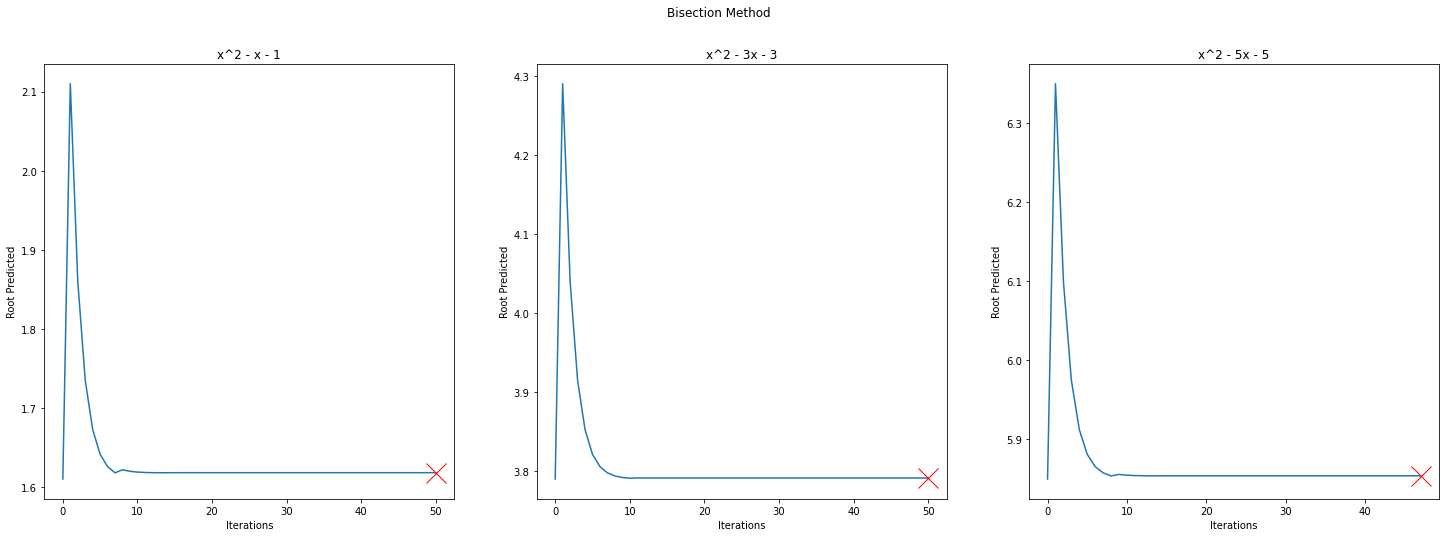

In [41]:
# Testing Bisection Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Bisection Method")

# Graph First Results
outcome, output, iteration, path, t = bisection(lambda x:x**2-x-1, .61, 2.61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1+math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = bisection(lambda x:x**2-3*x-3, 2.79, 4.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3+math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = bisection(lambda x:x**2-5*x-5, 4.85, 6.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5+3*math.sqrt(5))/2)
plt.show()

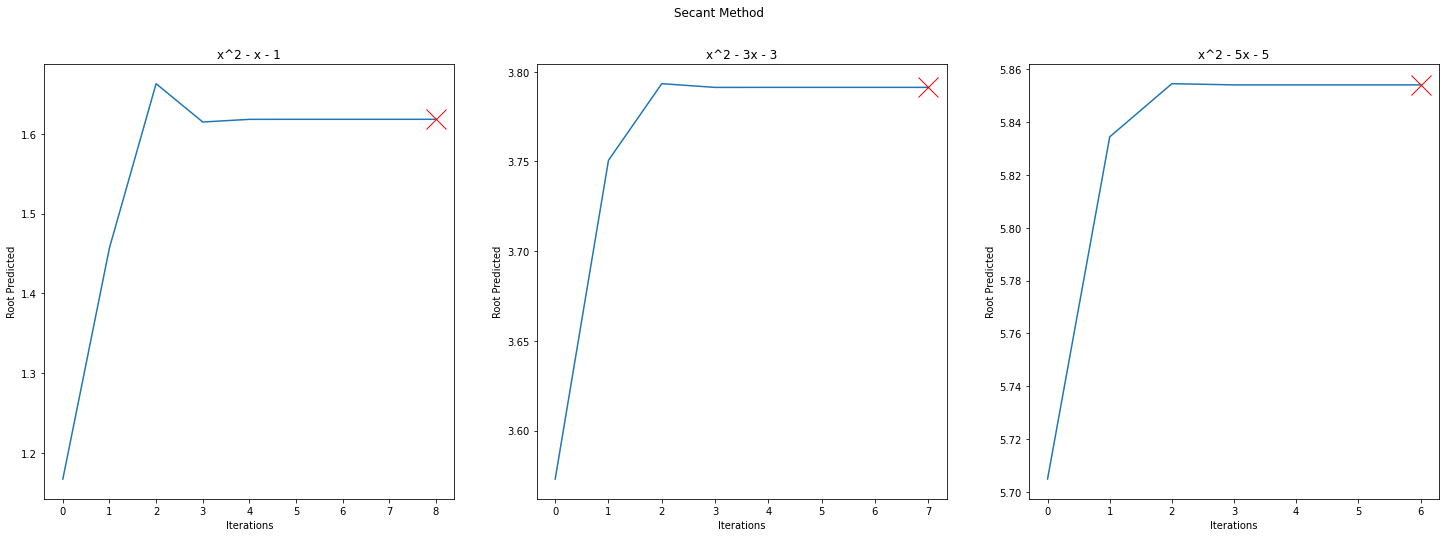

In [42]:
# Testing Secant Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Secant Method")

# Graph First Results
outcome, output, iteration, path, t = secant(lambda x:x**2-x-1, .61, 2.61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1+math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = secant(lambda x:x**2-3*x-3, 2.79, 4.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3+math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = secant(lambda x:x**2-5*x-5, 4.85, 6.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5+3*math.sqrt(5))/2)
plt.show()

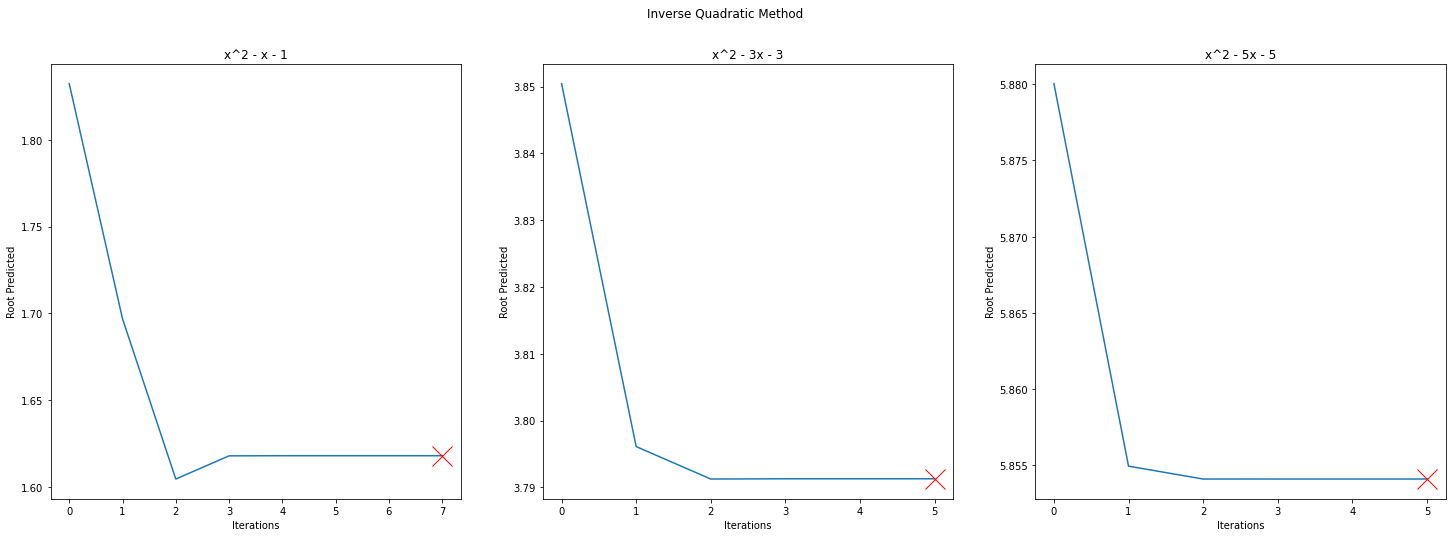

In [43]:
# Testing Inverse Quadratic Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Inverse Quadratic Method")

# Graph First Results
outcome, output, iteration, path, t = inverse_quadratic(lambda x:x**2-x-1, .61, 1.31, 2.61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1+math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = inverse_quadratic(lambda x:x**2-3*x-3, 2.79, 3.30, 4.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3+math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = inverse_quadratic(lambda x:x**2-5*x-5, 4.85, 5.35, 6.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5+3*math.sqrt(5))/2)
plt.show()

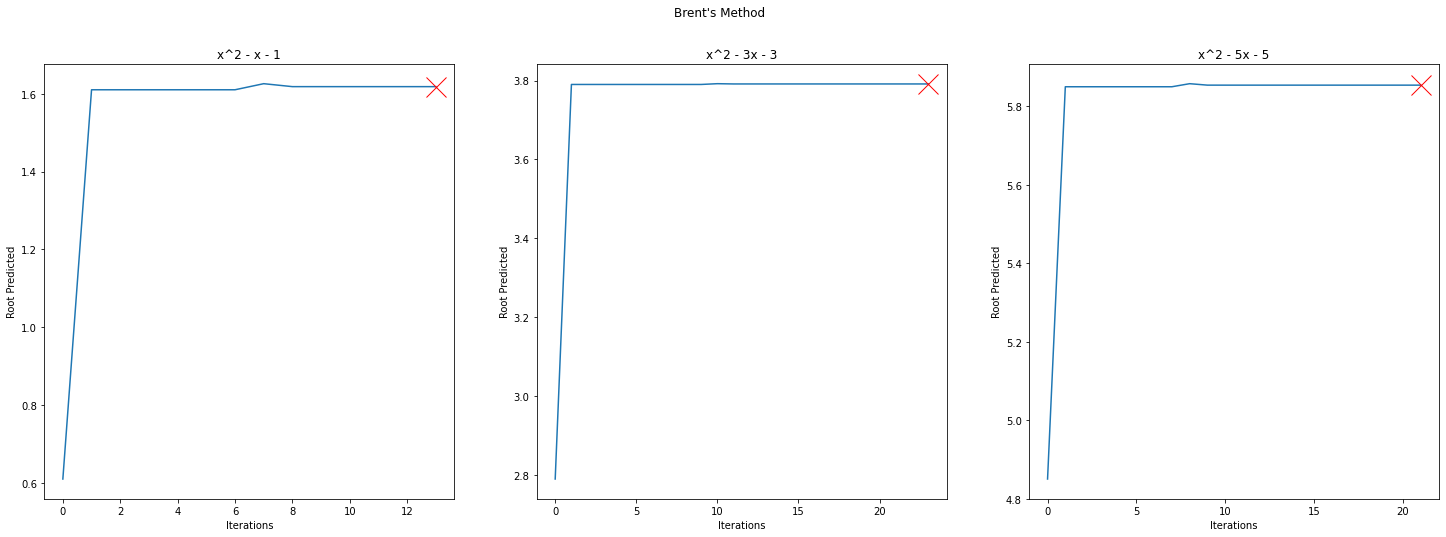

In [44]:
from time import time
# Testing Brent's Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Brent's Method")

# Graph First Results
outcome, output, iteration, path, t = brent(lambda x:x**2-x-1, .61, 2.61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1+math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = brent(lambda x:x**2-3*x-3, 2.79, 4.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3+math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = brent(lambda x:x**2-5*x-5, 4.85, 6.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5+3*math.sqrt(5))/2)
plt.show()

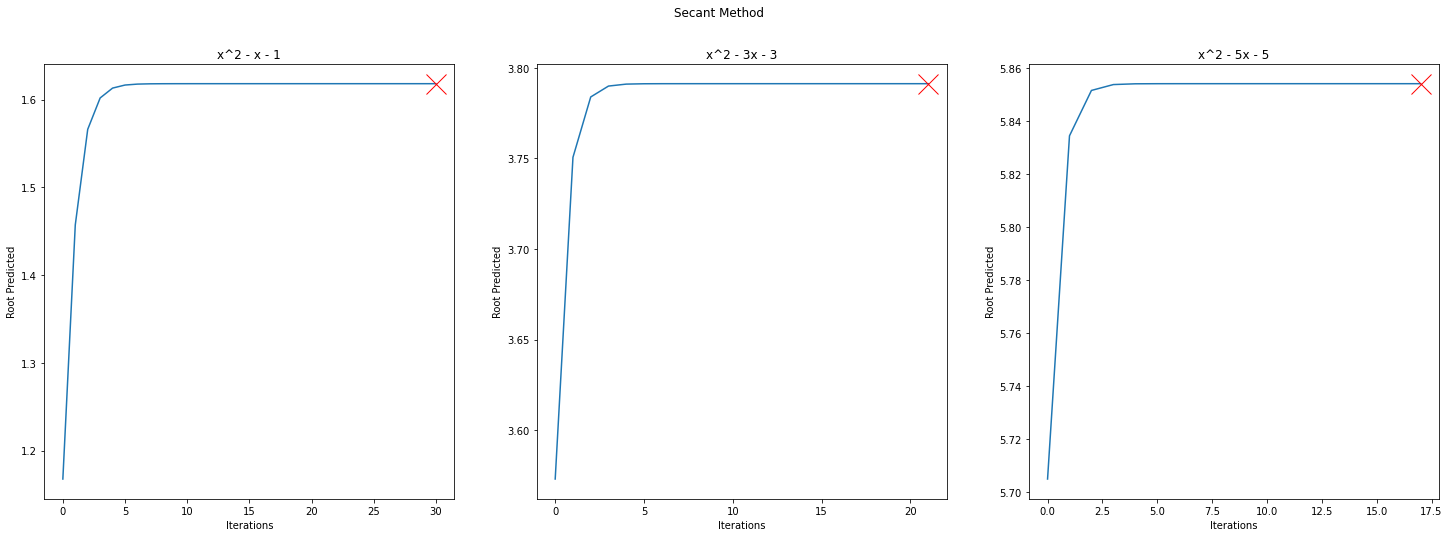

In [45]:
# Testing False Position Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Secant Method")

# Graph First Results
outcome, output, iteration, path, t = false_position(lambda x:x**2-x-1, .61, 2.61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1+math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = false_position(lambda x:x**2-3*x-3, 2.79, 4.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3+math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = false_position(lambda x:x**2-5*x-5, 4.85, 6.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5+3*math.sqrt(5))/2)
plt.show()

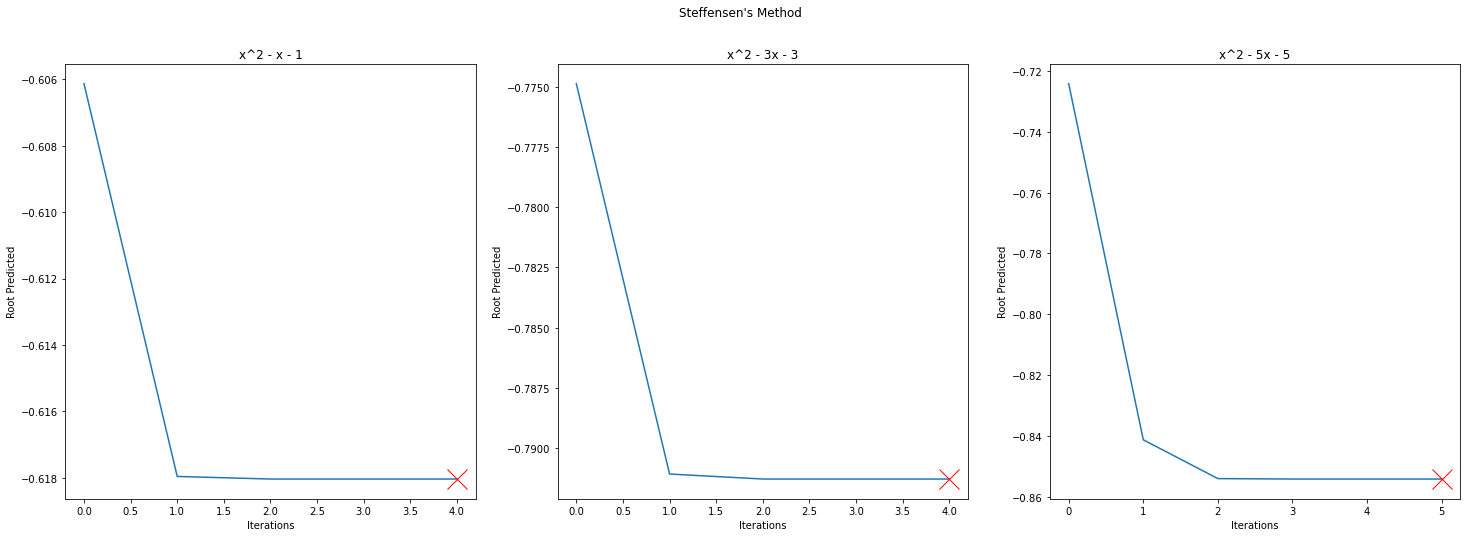

In [46]:
# Testing Steffensen's Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Steffensen's Method")

# Graph First Results
outcome, output, iteration, path, t = steffensen(lambda x:x**2-x-1, .61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1-math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = steffensen(lambda x:x**2-3*x-3, 2.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3-math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = steffensen(lambda x:x**2-5*x-5, 4.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5-3*math.sqrt(5))/2)
plt.show()

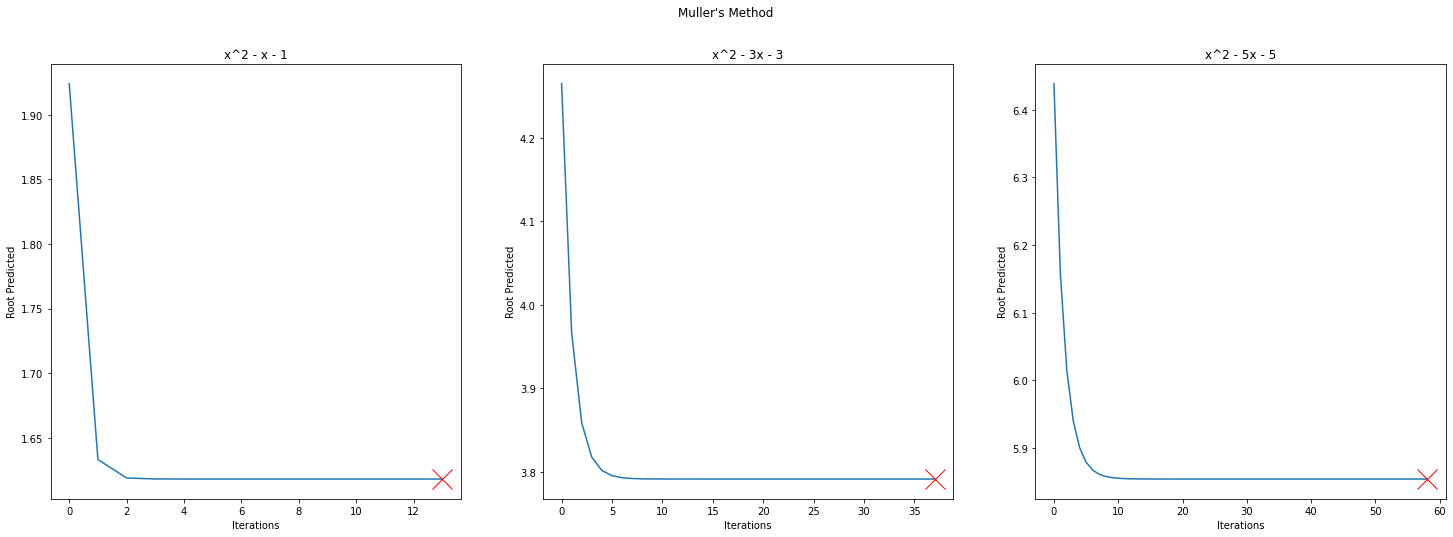

In [47]:
# Testing Muller's Method With 2nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(25,8)) # my screen may be too big
fig.suptitle("Muller's Method")

# Graph First Results
outcome, output, iteration, path, t = muller(lambda x:x**2-x-1, .61, 1.31, 2.61, tol, max_iterations)
# append results to table
graph(ax[0], "x^2 - x - 1", path, ((1+math.sqrt(5))/2))

# Graph Second Results
outcome, output, iteration, path, t = muller(lambda x:x**2-3*x-3, 2.79, 3.30, 4.79, tol, max_iterations)
# append results to table
graph(ax[1], "x^2 - 3x - 3", path, (3+math.sqrt(21))/2)

# Graph Third Results
outcome, output, iteration, path, t = muller(lambda x:x**2-5*x-5, 4.85, 5.35, 6.85, tol, max_iterations)
# append results to table
graph(ax[2], "x^2 - 5x - 5", path, (5+3*math.sqrt(5))/2)
plt.show()

In [48]:
# https://mpmath.org/doc/current/calculus/optimization.html <--- MUST CHECK has many equation
# Halleys
# Illinois
# Pegasus
# Anderson
# Ridder

In [49]:
# https://github.com/fredrik-johansson/mpmath/blob/c11db84b3237bd8fc6721f5a0c5d7c0c98a24dc1/mpmath/calculus/optimization.py#L341
def test(f, df, d2f, x):
    for i in range(max_iterations):
        prev = x
        fx = f(x)
        dfx = df(x)
        d2fx = d2f(x)
        x -=  2*fx*dfx / (2*dfx**2 - fx*d2fx)
        error = abs(x - prev)
        if f(x) < tol:
            return x, error
    return x, error

print(test(lambda x:x**2-x-1, lambda x:2*x-1, lambda x:2, 2.61))

(1.618033988749895, 3.26405569239796e-14)


In [50]:
# https://github.com/fredrik-johansson/mpmath/blob/c11db84b3237bd8fc6721f5a0c5d7c0c98a24dc1/mpmath/calculus/optimization.py#L694